In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
# # Creating a manageable v small list bc ...scared
# small_list = cities[:15]
# small_list

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
city_with_data = []

lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

counter = 0


for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    city_response = requests.get(query_url)
    city_json = city_response.json()
    
    try:
        city_data = city_json
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        city_with_data.append(city_data['name'])
        
        counter += 1
        if counter == 51:
            time.sleep(60)
            print(f'Zzzz...Counter Reset')
            counter = 1
    
        print(f"This is pull {counter} for {city} data.")
    
    except KeyError:
        print(f"Oops, no data for {city}.")

    

This is pull 1 for gualeguay data.
This is pull 2 for port saint lucie data.
This is pull 3 for sale data.
This is pull 4 for qasigiannguit data.
This is pull 5 for barrow data.
This is pull 6 for punta arenas data.
This is pull 7 for busselton data.
This is pull 8 for ixtapa data.
This is pull 9 for almaty data.
This is pull 10 for mataura data.
This is pull 11 for hobart data.
This is pull 12 for gat data.
This is pull 13 for ilulissat data.
This is pull 14 for kristinehamn data.
This is pull 15 for saint anthony data.
Oops, no data for grand river south east.
This is pull 16 for puerto berrio data.
This is pull 17 for saint george data.
This is pull 18 for mount gambier data.
This is pull 19 for zalantun data.
Oops, no data for taolanaro.
This is pull 20 for faanui data.
This is pull 21 for bluff data.
This is pull 22 for atuona data.
This is pull 23 for vaini data.
This is pull 24 for umm lajj data.
This is pull 25 for ahuimanu data.
This is pull 26 for soyo data.
This is pull 27 f

This is pull 19 for pevek data.
This is pull 20 for tiznit data.
This is pull 21 for midland data.
This is pull 22 for baranchinskiy data.
This is pull 23 for teguise data.
This is pull 24 for necochea data.
This is pull 25 for mackay data.
This is pull 26 for vostok data.
This is pull 27 for aitape data.
This is pull 28 for vao data.
This is pull 29 for vihti data.
This is pull 30 for gavle data.
This is pull 31 for meadow lake data.
This is pull 32 for tasiilaq data.
This is pull 33 for isangel data.
This is pull 34 for nemuro data.
This is pull 35 for severo-kurilsk data.
This is pull 36 for tura data.
This is pull 37 for pangnirtung data.
This is pull 38 for kristiansund data.
This is pull 39 for santa maria del oro data.
Oops, no data for belushya guba.
This is pull 40 for reghiu data.
This is pull 41 for graaff-reinet data.
This is pull 42 for talnakh data.
Oops, no data for bolungarvik.
This is pull 43 for cabedelo data.
This is pull 44 for leningradskiy data.
This is pull 45 fo

This is pull 34 for mweka data.
This is pull 35 for nardaran data.
This is pull 36 for rio grande data.
This is pull 37 for tambopata data.
This is pull 38 for ashland data.
This is pull 39 for potiskum data.
This is pull 40 for escanaba data.
This is pull 41 for union data.
This is pull 42 for miyako data.
This is pull 43 for chauk data.
This is pull 44 for lufilufi data.
This is pull 45 for erenhot data.
This is pull 46 for jibuti data.
This is pull 47 for blagoyevo data.
This is pull 48 for linkou data.
Oops, no data for samusu.
This is pull 49 for rio claro data.
This is pull 50 for salinas data.
Zzzz...Counter Reset
This is pull 1 for half moon bay data.
This is pull 2 for bay city data.
This is pull 3 for itaqui data.
This is pull 4 for sakakah data.
This is pull 5 for saint-joseph data.
This is pull 6 for dubno data.
This is pull 7 for sawtell data.
This is pull 8 for conde data.
This is pull 9 for ulaangom data.
Oops, no data for toftir.
This is pull 10 for sola data.
This is p

In [5]:
city_dict = {
    "city" : city_with_data,
    "lat" : lat,
    "lng" : lng,
    "max temp" : max_temp,
    "humidity" : humidity,
    "cloudiness" : cloudiness,
    "wind speed" : wind_speed,
    "country id" : country,
    "date" : date
}

city_df = pd.DataFrame(city_dict)
city_df.head()


,city,lat,lng,max temp,humidity,cloudiness,wind speed,country id,date
0,Gualeguay,-33.1416,-59.3097,73.94,58,0,7.92,AR,1643462502
1,Port Saint Lucie,27.2939,-80.3503,47.01,58,0,5.99,US,1643462502
2,Salé,34.0389,-6.8166,73.63,33,97,3.44,MA,1643462503
3,Qasigiannguit,68.8193,-51.1922,12.45,77,100,12.50,GL,1643462503
4,Barrow,71.2906,-156.7887,-7.58,71,100,12.66,US,1643462503


In [6]:
city_df.to_csv('output_data/weatherpy_data.csv', encoding="utf-8", index = False)

In [7]:
# city_df.info()

In [8]:
city_summary = city_df.describe()

city_summary

,lat,lng,max temp,humidity,cloudiness,wind speed,date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,20.154875,19.950914,51.140085,70.540034,56.976150,8.031721,1.643463e+09
std,33.170504,91.722148,32.530288,23.060013,41.414488,6.208450,2.708231e+02
min,-54.800000,-175.200000,-37.370000,3.000000,0.000000,0.000000,1.643462e+09
25%,-6.932750,-59.831250,28.020000,58.000000,9.500000,3.465000,1.643463e+09
50%,25.021300,21.548200,61.830000,76.000000,73.000000,6.290000,1.643463e+09
75%,48.022400,102.272600,77.950000,88.000000,100.000000,11.240000,1.643463e+09
max,78.218600,179.316700,99.820000,100.000000,100.000000,52.840000,1.643463e+09


In [9]:
over_hun = city_df.loc[city_df["humidity"] > 100]
city_df = city_df.loc[city_df["humidity"] != 100]

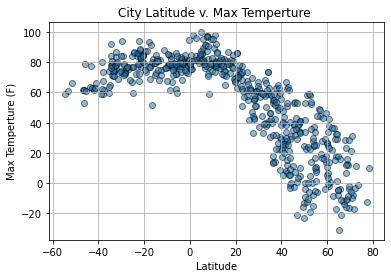

In [10]:
plt.scatter(city_df["lat"], city_df["max temp"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Max Temperture ')
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")

plt.savefig("output_data/city_lat_temp.png")

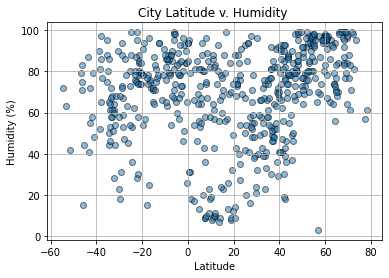

In [11]:
plt.scatter(city_df["lat"], city_df["humidity"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Humidity ')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/city_lat_humidity.png")

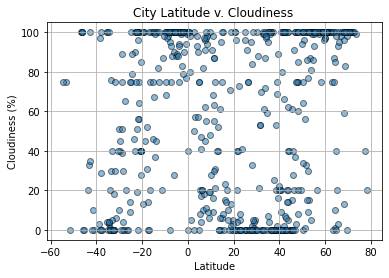

In [12]:
plt.scatter(city_df["lat"], city_df["cloudiness"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Cloudiness ')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/city_lat_cloudiness.png")

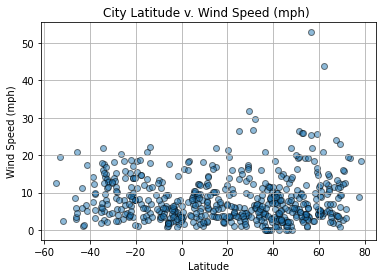

In [13]:
plt.scatter(city_df["lat"], city_df["wind speed"], alpha = 0.5, edgecolor = "black")
plt.grid()

plt.title('City Latitude v. Wind Speed (mph) ')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/city_lat_windspeed.png")

In [14]:
northernhem = city_df.loc[(city_df["lat"] >= 0)]

In [15]:
southernhem = city_df.loc[(city_df["lat"] <= 0)]

The r-squared is: 0.7304858373686908


Text(0, 20, 'y = -1.36x +93.68')

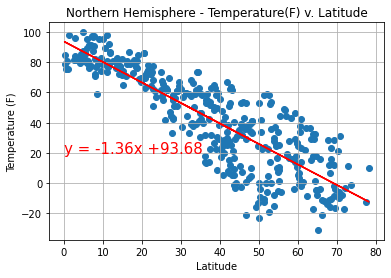

In [16]:
# Northern Hemisphere - Temperature (F) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["max temp"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["max temp"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Temperature(F) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0, 20), fontsize = 15, color = "red")


The r-squared is: 0.1489013839881294


Text(-50, 55, 'y= 0.24x +81.16')

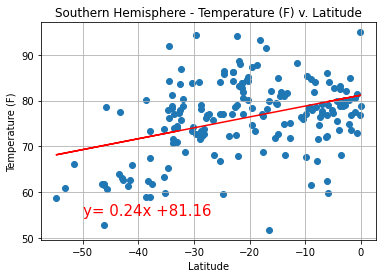

In [17]:
# Southern Hemisphere - Temperature (F) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["max temp"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["max temp"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Temperature (F) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq, (-50, 55), fontsize = 15, color = "red")

The r-squared is: 0.2226324141092947


Text(40, 20, 'y = 0.58x +46.32')

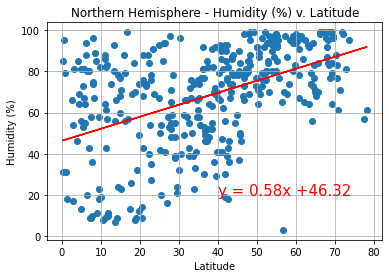

In [18]:
# Northern Hemisphere - Humidity (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["humidity"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["humidity"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Humidity (%) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (40, 20), fontsize = 15, color = "red")

The r-squared is: 0.09491762159787988


Text(-30, 40, 'y= 0.42x +80.19')

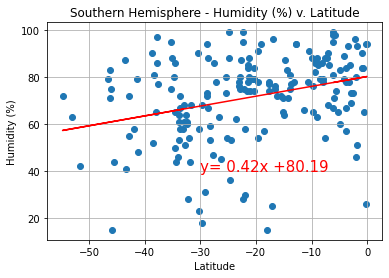

In [19]:
# Southern Hemisphere - Humidity (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["humidity"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["humidity"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Humidity (%) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (-30, 40), fontsize = 15, color = "red")

The r-squared is: 0.09376482220636682


Text(40, 40, 'y = 0.66x +29.4')

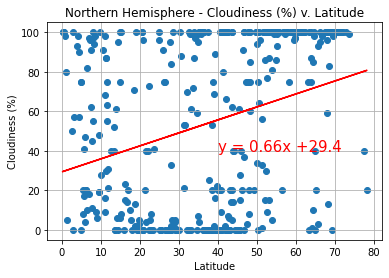

In [20]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["cloudiness"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["cloudiness"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Cloudiness (%) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (40, 40), fontsize = 15, color = "red")

The r-squared is: 0.2567629286261456


Text(-50, 60, 'y= 1.49x +91.36')

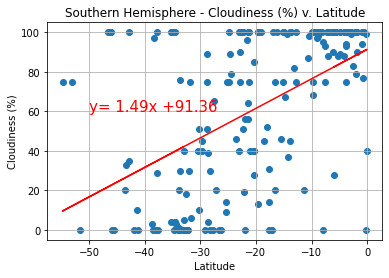

In [21]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["cloudiness"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["cloudiness"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Cloudiness (%) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (-50, 60), fontsize = 15, color = "red")

The r-squared is: 0.009629379379950325


Text(10, 25, 'y = 0.03x +6.91')

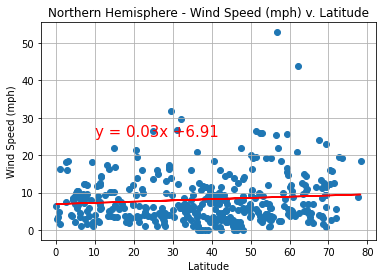

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (northernhem["lat"], northernhem["wind speed"])

regression_values = (northernhem["lat"] * slope) + intercept 

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northernhem["lat"], northernhem["wind speed"])
plt.plot(northernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Northern Hemisphere - Wind Speed (mph) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (10, 25), fontsize = 15, color = "red")

The r-squared is: 0.07637777798442554


Text(-32, 25, 'y= -0.11x +5.98')

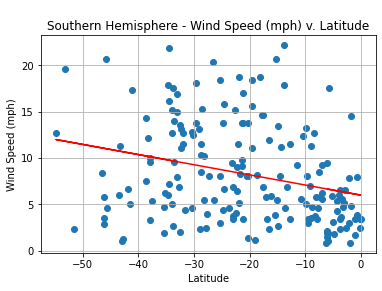

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

(slope, intercept, rvalue, pvalue, stderr) = linregress (southernhem["lat"], southernhem["wind speed"])

regression_values = (southernhem["lat"] * slope) + intercept

line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southernhem["lat"], southernhem["wind speed"])
plt.plot(southernhem["lat"], regression_values, "r-")
print(f"The r-squared is: {rvalue**2}")

plt.grid()

plt.title("Southern Hemisphere - Wind Speed (mph) v. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (-32, 25), fontsize = 15, color = "red")